# Further Evaluation: Discord Spam Detector

### Tamara Frances
<br>

---
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_excel('../data/data-for-capstone.xlsx')
df.columns = df.columns.str.lower()
df = df.rename(columns={'spam?':'spam'})

In [3]:
X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)
mnb.score(X_train_cv, y_train),  mnb.score(X_test_cv, y_test)


pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('mnb', MultinomialNB())
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2), (2,2)),
    'mnb__alpha': [0.01, 0.05, 0.1]
}
    
gs_mnb = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_mnb.fit(X_train, y_train)

cr_mnb = classification_report(y_test, gs_mnb.predict(X_test))
print("Classification Report:")
print(cr_mnb)

Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.98      0.97       143
           Y       0.80      0.63      0.71        19

    accuracy                           0.94       162
   macro avg       0.88      0.81      0.84       162
weighted avg       0.93      0.94      0.94       162



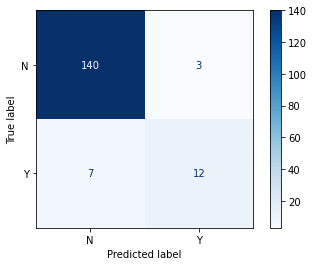

In [4]:
ConfusionMatrixDisplay.from_estimator(gs_mnb, X_test, y_test, cmap='Blues');

<br>
<br>

---

<br>
<br>

In [5]:
test_preds = gs_mnb.predict(X_test)
pd.set_option('display.max_colwidth', None)

In [6]:
misclassifications = pd.DataFrame(X_test)

misclassifications['pred class'] = test_preds
misclassifications['true class'] = y_test

mis = misclassifications[misclassifications['pred class'] != misclassifications['true class']]
mis

,text,pred class,true class
99,yes when you rent you’ll typically get access to the bot server where they have guides and help with setups,Y,N
638,Exclusive access & special offers to live events at physical bars & restaurants in conjunction with the BOTY relaunch,N,Y
643,We are offering Refund services to our clients where we get 80% Off Your Orders,N,Y
592,Nova Creed is doing things differently. Most projects launch with a big collection and a 12 to 24 month roadmap detailing when they will deliver different elements of the project. Not Nova Creed.,N,Y
640,"NANONINJAS JUST OPENED THEIR STEALTH WHITELIST FOR THE NEXT 100 ACTIVE PEOPLE, BE QUICK!!!",N,Y
581,They pay you to own their NFTs which are mansions and estates on top of plots of land.,N,Y
614,Meta-zoo in collaboration with other big projects,N,Y
585,I saw that you were interested in NFT projects - have you heard of Angrymals? Angrymals NFTs are now available on Magic Eden with floor price of 5 SOL.,N,Y
27,Ended up refunding the game,Y,N
339,Paid for my nft several times over between giveaways and wl spots,Y,N


In [7]:
text = ' '.join(misclassifications['text'])
wordcloud = WordCloud(stopwords = STOPWORDS,width=1000, height=400, min_font_size = 12, max_font_size=200, max_words=40,
                      background_color="white",
                      colormap = 'gist_heat',
                      min_word_length = 4).generate(text) #get rid of smaller words/parts of contractions that aren't descriptive

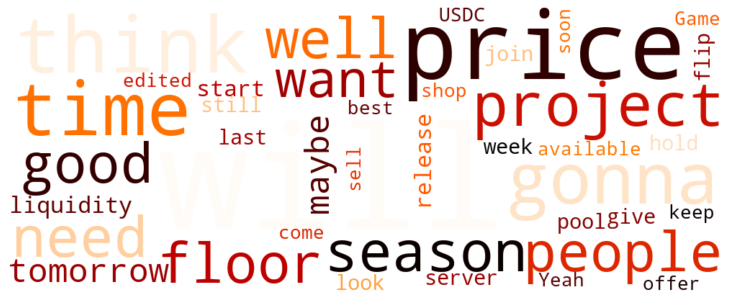

In [8]:
plt.figure(figsize=(12,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()